In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import the pakeges

In [2]:
data = pd.read_csv("Dream.csv")
#load the data

In [3]:
import calendar

In [4]:
neg = {}
pos = {}
neu = {}

In [5]:
for i in range(len(data)):
    time = 0
    try:
        if data['Time'][i] != 'None':
            d1 = data['Time'][i].split()[-1]
            d2 =list(calendar.month_name).index(data['Time'][i].split()[-2])
            if int(d2) < 10:
                d2 = '0' + str(d2)
            d3 = data['Time'][i].split()[-3]
            if int(d3) < 10:
                d3 = '0' + str(d3)
            #print(d1,d2,d3)
            data['Time'][i] = int(d1 + str(d2) + str(d3))
    except BaseException:
        pass
        

/home/sunny/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [6]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

for i in range(len(data)):
    ss = sid.polarity_scores(data['Content'][i])
    T = data['Time'][i]
    if T != 'None':
        neg[str(T)] = ss['neg']
        pos[str(T)] = ss['pos']
        neu[str(T)] = ss['neu']
    else:
        neg[str(0)] = ss['neg']
        pos[str(0)] = ss['pos']
        neu[str(0)] = ss['neu']

In [7]:
pos = sorted(pos.items(), key = lambda k:k[0])
neg = sorted(neg.items(), key = lambda k:k[0])
neu = sorted(neu.items(), key = lambda k:k[0])

In [8]:
pos

[('20130314', 0.119),
 ('20130315', 0.067),
 ('20130317', 0.126),
 ('20130418', 0.079),
 ('20130614', 0.086),
 ('20131231', 0.059),
 ('20140302', 0.038),
 ('20140304', 0.055),
 ('20140310', 0.096),
 ('20140513', 0.112),
 ('20140626', 0.203),
 ('20140707', 0.066),
 ('20140806', 0.02),
 ('20140904', 0.12),
 ('20140906', 0.024),
 ('20140909', 0.082),
 ('20140914', 0.08),
 ('20140918', 0.042),
 ('20140919', 0.031),
 ('20141024', 0.099),
 ('20141028', 0.038),
 ('20141108', 0.071),
 ('20141109', 0.093),
 ('20141110', 0.199),
 ('20141111', 0.081),
 ('20141112', 0.114),
 ('20141117', 0.104),
 ('20141118', 0.122),
 ('20141119', 0.074),
 ('20141219', 0.102),
 ('20150102', 0.015),
 ('20150107', 0.155),
 ('20150108', 0.023),
 ('20150127', 0.124),
 ('20150216', 0.092),
 ('20150226', 0.168),
 ('20150308', 0.12),
 ('20150313', 0.079),
 ('20150318', 0.0),
 ('20150328', 0.0),
 ('20150408', 0.038),
 ('20150414', 0.054),
 ('20150421', 0.095),
 ('20150422', 0.057),
 ('20150424', 0.088),
 ('20150508', 0.06

In [9]:
k = 0
pos = pos[k:]
neu = neu[k:]
neg = neg[k:]

In [10]:
print(int(pos[5][0]))
print(int(pos[0][0]))
int(pos[5][0])//100 - int(pos[0][0])//100

20131231
20130314


9

In [11]:
def Process(L):
    List = [[],[]]
    stime = int(L[0][0]) // 100 * 100
    ntime = stime + 100
    sum = 0
    count = 0
    for a in L:
        t = int(a[0])
        k = t//100 - stime//100
        if t >= ntime:
            List[0].append(stime/10000)
            List[1].append(sum/count)
            stime = stime + 100*k
            ntime = ntime + 100*k
            count = 0
            sum = 0
        if t >= stime and t <= ntime:
            sum = sum + a[1]
            count = count + 1
    l = {
    'index' : [],
    'time' : [],
    'value' : []
    }
    c = 0
    for i in range(len(List[0]) - 1):
        if List[0][i+1] - List[0][i] != 0.01 and int(List[0][i+1]) == int(List[0][i]):
            n = List[0][i+1]*100 - List[0][i]*100 - 1
            n = int(n)
            if n > 0:
                for j in range(n):
                    c = c + 1
                    l['index'].append(c + i)
                    l['time'].append(List[0][i] + 0.01*(j+1))
                    l['value'].append((List[1][i] + List[1][i+1])/2)
    for i in range(len(l['index'])):
        List[0].insert(l['index'][i],l['time'][i])
        List[1].insert(l['index'][i],l['value'][i])
    return List

In [12]:
Pos = Process(pos)
for i in range(len(Pos[0])):
    Pos[0][i] = str(Pos[0][i])
    if Pos[0][i][-2] == '.':
        Pos[0][i] = Pos[0][i] + '0'
    Pos[0][i] = Pos[0][i][2:]
    if Pos[0][i][-2] == '0':
        Pos[0][i] = Pos[0][i][:-2] + Pos[0][i][-1]

In [13]:
Pos[0][1]

'13.4'

In [14]:
Neg = Process(neg)
for i in range(len(Neg[0])):
    Neg[0][i] = str(Neg[0][i])
Neg[0][3]

'2013.06'

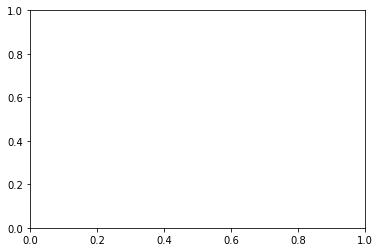

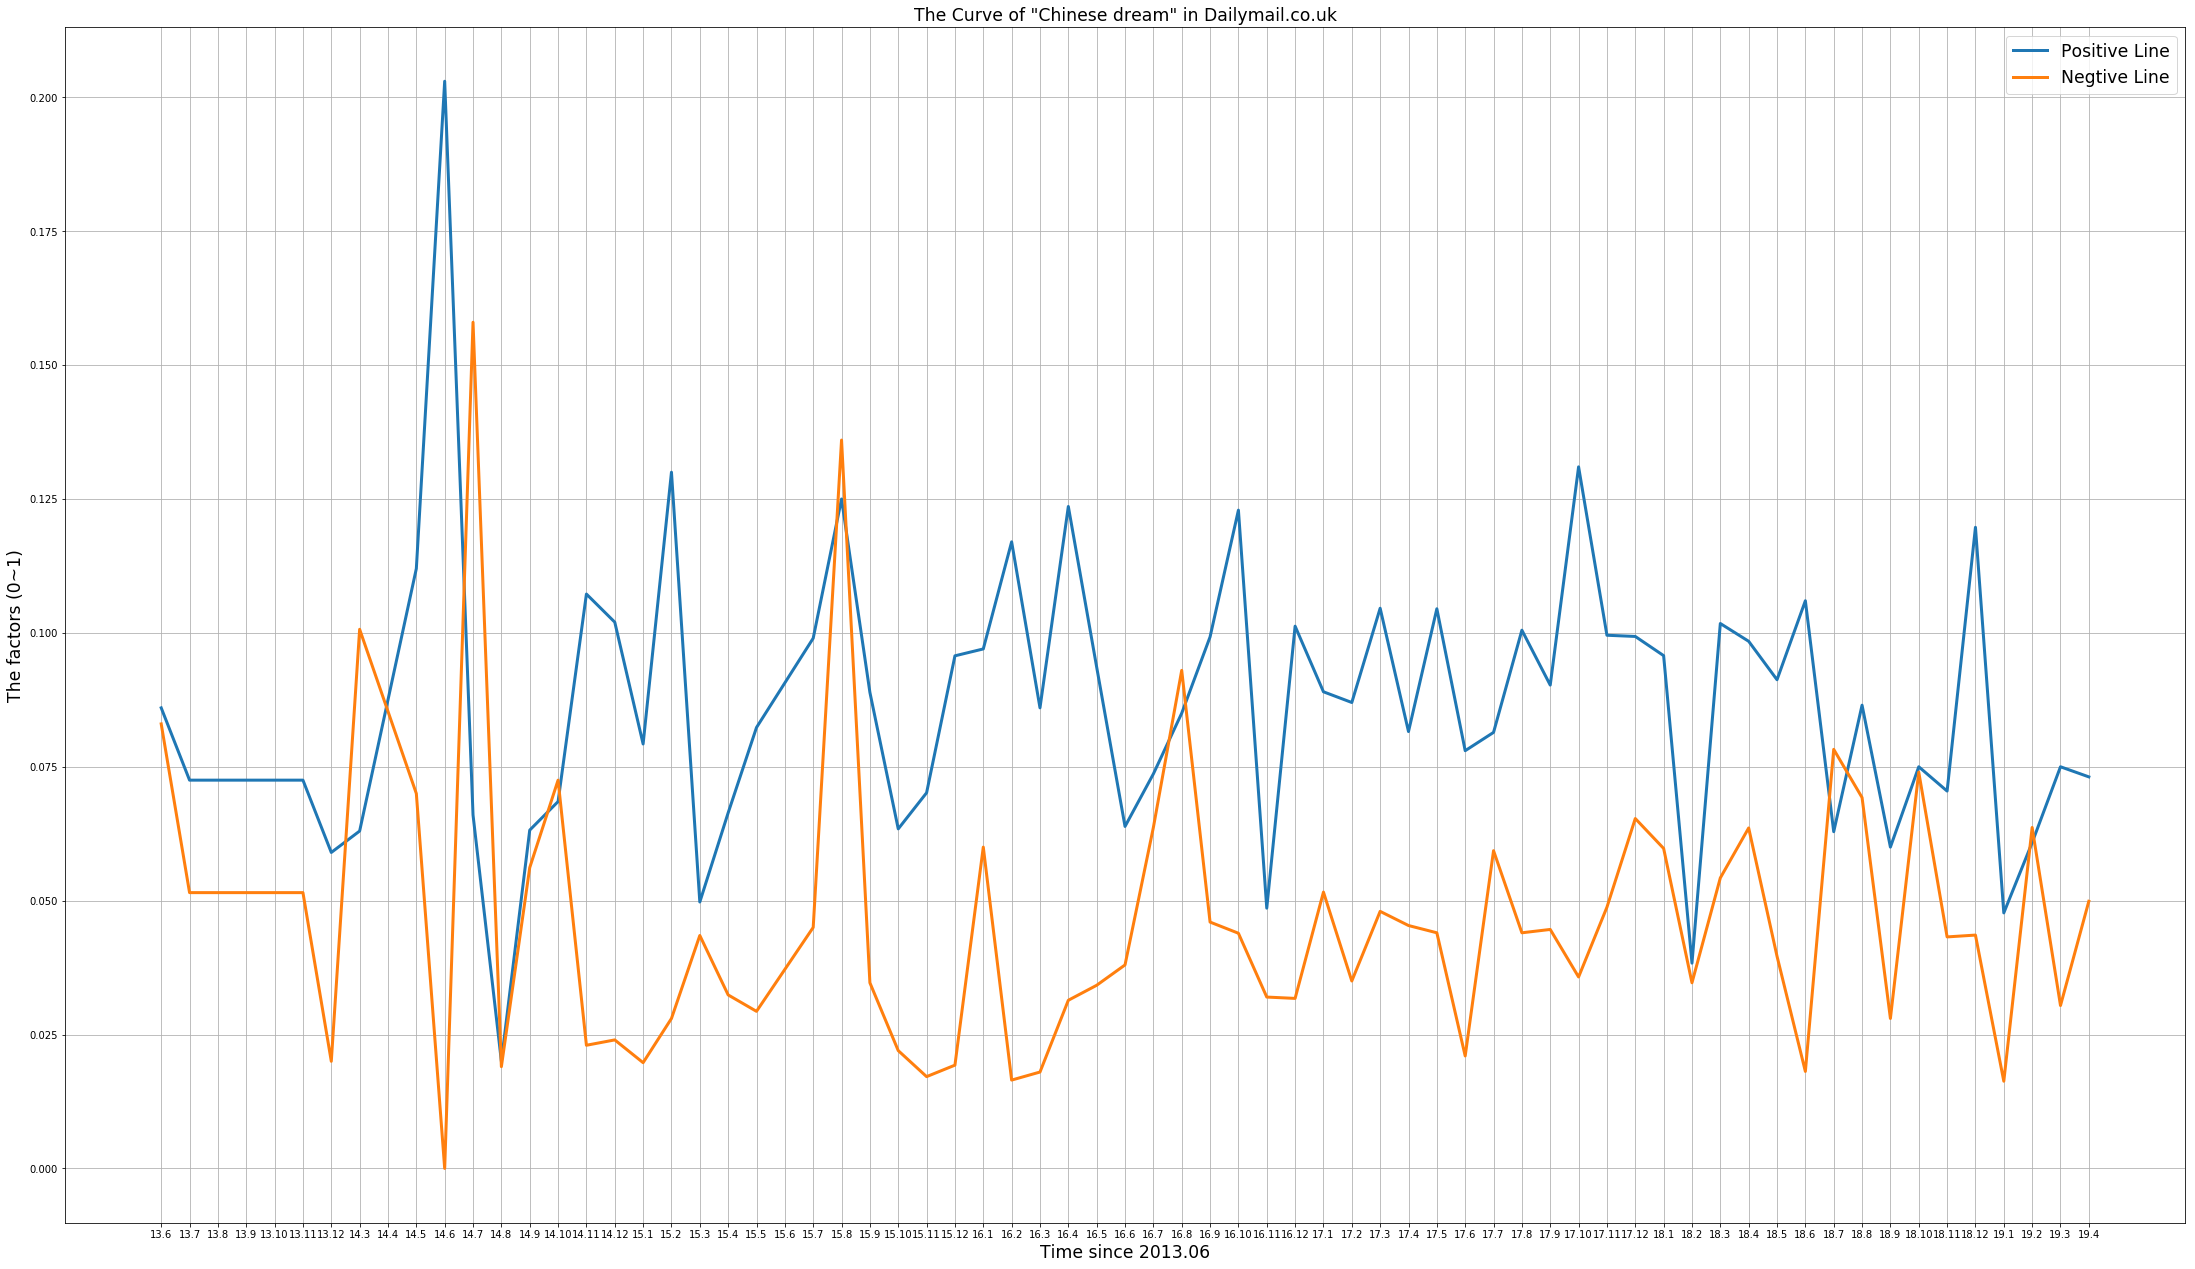

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax = plt.subplots()
x1 = np.arange(0,len(Pos[0][3:]))
y1 = Pos[1][3:]
x2 = np.arange(0,len(Neg[0][3:]))
y2 = Neg[1][3:]
group_labels = Pos[0][3:]
plt.figure(figsize=(38, 22))
plt.plot(x1,y1,lw = 3)
plt.plot(x2,y2,lw = 3)
plt.legend(['Positive Line','Negtive Line'],fontsize = 'xx-large')
my_x_ticks = np.arange(0, len(Pos[0][3:]))
plt.xticks(my_x_ticks, group_labels, rotation=0)
plt.grid()
plt.title('The Curve of "Chinese dream" in Dailymail.co.uk',fontsize = 'xx-large')
plt.xlabel('Time since 2013.06',fontsize = 'xx-large')
plt.ylabel('The factors (0~1)',fontsize = 'xx-large')
plt.savefig('Chinese_dream.jpg')
plt.show()

In [16]:
np.arange(0,len(Pos[1]))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71])

In [17]:
temp1 = (y1[6] + y1[7])/2
temp2 = (y2[6] + y2[7])/2
y1.insert(7,temp1)
y1.insert(8,temp1)
y2.insert(7,temp2)
y2.insert(8,temp2)

In [18]:
Y1 = np.array(y1)
Y2 = np.array(y2)

In [19]:
np.save('Dream_pos.npy',Y1)
np.save('Dream_neg.npy',Y2)

In [20]:
posindex = np.sum(y1)/len(y1)

negindex = np.sum(y2)/len(y2)

posindex,negindex

(0.08568523405389604, 0.04749046243271596)